<a href="https://colab.research.google.com/github/HabibMbow94/test-live-coding/blob/master/Habib_MBOW_LogRegression_students_version_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Question 0: Import the dataset Dataset

In [3]:
##### WRITE YOUR CODE HERE #####
path= '/content/diabetes.csv'
data= pd.read_csv(path)
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [4]:
##### WRITE YOUR CODE HERE #####
data.head(5)
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [5]:
##### WRITE YOUR CODE HERE #####
data.dtypes
#### END CODE ####

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [6]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [7]:
##### WRITE YOUR CODE HERE #####
def scale_features(data):
  scale = (data - data.mean())/data.std()
  return scale
#### END CODE ####

Question 5: Scale your features, except the target. 

In [8]:
##### WRITE YOUR CODE HERE #####
scale_features(data.iloc[:,:-1])
#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483
...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [9]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [10]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [63]:
class logistic_regression:
  def __init__(self, x_test, y_test, num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters = num_iters
    self.threshold = threshold
    self.tolerance = tolerance
    self.lr = lr
    self.theta = None
    self.cost_history = []
    self.cost_history_test = []
    self.x_test = x_test
    self.y_test = y_test
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new= np.c_[np.ones((x.shape[0], 1)), x]
    return x_new
    #### END CODE ####

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    z= x@theta
    g = 1/(1+np.exp(z))
    return g
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = len(x) # Length of x
    
    y_pred = self.sigmoid(x, self.theta)
    Cost = -sum(y_true*np.log(y_pred) + (1-y_true)*np.log(1 - y_pred))/n
        
    return Cost
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1,1) # reshape y. This is optional, do it if needed
    self.x_test = self.add_ones(self.x_test)
    self.y_test= self.y_test.reshape(-1,1)

    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x, self.theta) # using sigmoid function 

      # Gradient of cross-entropy
      grad= x.T@(y-y_pred)
      grad= grad.reshape(-1,1) # Reshape, if it is needed

      # update rules
      self.theta= self.theta - 1/len(y) * self.lr*grad
      # Compute the training loss
      self.cost_history.append(self.cross_entropy(x,y))
      self.cost_history_test.append(self.cross_entropy(self.x_test,self.y_test))

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict(self, x):
    proba= self.predict_proba(x) # Get probability of x
    result= [1 if p > self.threshold else 0 for  p in proba]  # Convert proba to 0 or 1. hint: list comprehension
    return  result
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x, self.theta) # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.plot(range(len(self.cost_history)),self.cost_history, label='Train Losss')
    plt.plot(range(len(self.cost_history_test)),self.cost_history_test, label='Test Losss')
    plt.legend()
    #### END CODE ####

In [64]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(x_test= x_test, y_test= y_test, num_iters=10000)

In [65]:
%%time
model.fit(x_train, y_train)

cost for 100 iteration : [0.65503386]
cost for 200 iteration : [0.64822181]
cost for 300 iteration : [0.64295686]
cost for 400 iteration : [0.63877086]
cost for 500 iteration : [0.63542724]
cost for 600 iteration : [0.63274387]
cost for 700 iteration : [0.63057919]
cost for 800 iteration : [0.62882338]
cost for 900 iteration : [0.62739113]
cost for 1000 iteration : [0.62621602]
cost for 1100 iteration : [0.62524618]
cost for 1200 iteration : [0.62444092]
cost for 1300 iteration : [0.62376821]
cost for 1400 iteration : [0.62320272]
cost for 1500 iteration : [0.62272432]
cost for 1600 iteration : [0.62231697]
cost for 1700 iteration : [0.62196781]
cost for 1800 iteration : [0.6216665]
cost for 1900 iteration : [0.62140471]
cost for 2000 iteration : [0.62117568]
cost for 2100 iteration : [0.62097391]
cost for 2200 iteration : [0.62079492]
cost for 2300 iteration : [0.62063504]
cost for 2400 iteration : [0.62049127]
cost for 2500 iteration : [0.62036113]
cost for 2600 iteration : [0.620242

In [66]:
pred= model.predict(x_test)

In [67]:
pred

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [68]:
# Predict Proba
print(model.predict_proba(x_test))

[[0.29851543]
 [0.29049734]
 [0.38184057]
 [0.31897068]
 [0.49625096]
 [0.79978465]
 [0.44020894]
 [0.41069323]
 [0.32966635]
 [0.35280248]
 [0.34082719]
 [0.79166825]
 [0.61553355]
 [0.36960189]
 [0.28687457]
 [0.35830215]
 [0.35417844]
 [0.39378864]
 [0.25344108]
 [0.34965958]
 [0.28538829]
 [0.51179463]
 [0.26146333]
 [0.461609  ]
 [0.37346347]
 [0.27543555]
 [0.18017363]
 [0.51509671]
 [0.41926754]
 [0.44206586]
 [0.79718722]
 [0.46107762]
 [0.32560895]
 [0.37573242]
 [0.19080104]
 [0.28623977]
 [0.63738845]
 [0.30922338]
 [0.27416772]
 [0.37680956]
 [0.34097431]
 [0.49303351]
 [0.89711346]
 [0.46154894]
 [0.39026802]
 [0.36688957]
 [0.31533572]
 [0.43834852]
 [0.24614533]
 [0.20577171]
 [0.34810464]
 [0.40897569]
 [0.40850065]
 [0.28141976]
 [0.60234598]
 [0.33719076]
 [0.39751527]
 [0.4123097 ]
 [0.32654991]
 [0.27664866]
 [0.49636315]
 [0.34780948]
 [0.36450692]
 [0.19543969]
 [0.25578678]
 [0.35991026]
 [0.82543108]
 [0.3868214 ]
 [0.39680563]
 [0.52644043]
 [0.41789214]
 [0.40

In [69]:
model.cost_history

[array([0.68934763]),
 array([0.68610529]),
 array([0.68333113]),
 array([0.6809504]),
 array([0.67890049]),
 array([0.67712901]),
 array([0.67559212]),
 array([0.67425317]),
 array([0.6730815]),
 array([0.67205142]),
 array([0.6711414]),
 array([0.6703334]),
 array([0.66961225]),
 array([0.66896521]),
 array([0.66838153]),
 array([0.66785218]),
 array([0.66736952]),
 array([0.66692709]),
 array([0.66651943]),
 array([0.66614191]),
 array([0.6657906]),
 array([0.66546215]),
 array([0.66515373]),
 array([0.66486291]),
 array([0.66458761]),
 array([0.66432606]),
 array([0.66407675]),
 array([0.66383836]),
 array([0.66360977]),
 array([0.66339001]),
 array([0.66317824]),
 array([0.66297373]),
 array([0.66277584]),
 array([0.66258404]),
 array([0.66239782]),
 array([0.66221676]),
 array([0.6620405]),
 array([0.66186869]),
 array([0.66170104]),
 array([0.66153729]),
 array([0.66137721]),
 array([0.66122058]),
 array([0.66106721]),
 array([0.66091692]),
 array([0.66076957]),
 array([0.660625

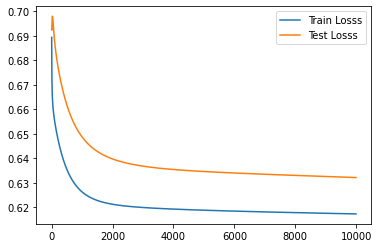

In [70]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [18]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [19]:
! git clone https://github.com/{username}/{my_repository}.git

Cloning into 'github.com'...
fatal: could not read Username for 'https://github.com': No such device or address


In [20]:
! git remote -v

fatal: not a git repository (or any of the parent directories): .git


Copy data to test-live-coding folder

In [21]:
!cp diabetes.csv /content/test-live-coding

In [22]:
%cd /content/test-live-coding

[Errno 20] Not a directory: '/content/test-live-coding'
/content


In [23]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [24]:
!git config user.email useremail
!git config user.name username

fatal: not in a git directory
fatal: not in a git directory


In [25]:
!git add .
!git commit -m "Add my files"

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [26]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [27]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


# If you cannot push, use:

In [28]:
!git remote rm origin

fatal: not a git repository (or any of the parent directories): .git


In [29]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [30]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [31]:
class logistic_regression_l1:
  pass

In [32]:
class logistic_regression_l2:
  pass

In [33]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?